# imports

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Analysis

In [2]:
metrics = pd.read_csv(
    '/content/drive/MyDrive/Colab Notebooks/amazon/Metrics.csv'
)

In [4]:
metrics

,model,accuracy,precision,recall,f1_score,roc_auc_score,type
0,SVC,0.903389,0.990034,0.815328,0.894228,0.903546,train
1,SVC,0.815500,0.804154,0.826220,0.815038,0.815669,test
2,XGBClassifier,0.916389,0.989827,0.841726,0.909788,0.916522,train
3,XGBClassifier,0.717500,0.641077,0.967480,0.771162,0.721437,test
4,NaiveBayes,0.820000,0.934155,0.689219,0.793209,0.820233,train
...,...,...,...,...,...,...,...
67,MLP,0.708000,0.631752,0.974593,0.766587,0.712198,test
68,XGBClassifier,0.916389,0.989827,0.841726,0.909788,0.916522,train
69,XGBClassifier,0.717500,0.641077,0.967480,0.771162,0.721437,test
70,LogisticRegression,0.898056,0.976130,0.816437,0.889171,0.898201,train


In [6]:
metrics.model.value_counts()

XGBClassifier         24
SVC                   12
NaiveBayes            12
MLP                   12
LogisticRegression    12
Name: model, dtype: int64

In [8]:
# metrics statistics
metrics.describe().T

,count,mean,std,min,25%,50%,75%,max
accuracy,72.0,0.825987,0.088348,0.581250,0.777542,0.840278,0.903826,0.949028
precision,72.0,0.850223,0.148028,0.539921,0.723142,0.882153,0.988878,1.000000
recall,72.0,0.844742,0.087380,0.586291,0.815328,0.835297,0.906805,0.979248
f1_score,72.0,0.833599,0.066207,0.670923,0.778273,0.829914,0.895524,0.946842
roc_auc_score,72.0,0.827437,0.086035,0.591906,0.778117,0.839989,0.904014,0.949209


In [15]:
# model wise stats
metrics.groupby(
    by='model'
).agg(['mean', 'max', 'min', 'std'])

<ipython-input-15-722ee3bdb02f>:2: FutureWarning: ['type'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  metrics.groupby(


accuracy                               precision  \
                        mean       max       min       std      mean   
model                                                                  
LogisticRegression  0.840243  0.905139  0.775000  0.056351  0.846014   
MLP                 0.830696  0.949028  0.654375  0.101991  0.844383   
NaiveBayes          0.788880  0.859583  0.581250  0.073387  0.865993   
SVC                 0.853130  0.915347  0.760000  0.052771  0.889904   
XGBClassifier       0.821486  0.943681  0.606875  0.111590  0.827521   

                                                    recall            \
                         max       min       std      mean       max   
model                                                                  
LogisticRegression  0.986627  0.700752  0.124756  0.862088  0.947154   
MLP                 0.993927  0.587200  0.170484  0.878934  0.974593   
NaiveBayes          1.000000  0.539921  0.125118  0.715720  0.885863   
SVC                 0.993205  0.723009  0.108242  0.819366  0.885863   
XGBClassifier       0.992027  0.551901  0.178022  0.896172  0.979248   

                                        f1_score                      \
                         min       std      mean       max       min   
model                                                                  
LogisticRegression  0.796748  0.054885  0.845782  0.898408  0.794498   
MLP                 0.787156  0.071207  0.846035  0.946842  0.726373   
NaiveBayes          0.586291  0.069702  0.774082  0.841287  0.670923   
SVC                 0.745342  0.032190  0.849010  0.908669  0.772942   
XGBClassifier       0.820541  0.065854  0.843343  0.941022  0.705937   

                             roc_auc_score                                
                         std          mean       max       min       std  
model                                                                     
LogisticRegression  0.042245      0.841254  0.905420  0.777711  0.055488  
MLP                 0.071584      0.832614  0.949209  0.664787  0.099199  
NaiveBayes          0.048782      0.789415  0.860062  0.591906  0.070799  
SVC                 0.046073      0.853553  0.915657  0.761107  0.052349  
XGBClassifier       0.076448      0.823893  0.943877  0.619901  0.108287

In [21]:
average_scores = metrics.groupby(
    by='model'
).mean()
average_scores

<ipython-input-21-075a4e5d8946>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_scores = metrics.groupby(


,accuracy,precision,recall,f1_score,roc_auc_score
model,,,,,
LogisticRegression,0.840243,0.846014,0.862088,0.845782,0.841254
MLP,0.830696,0.844383,0.878934,0.846035,0.832614
NaiveBayes,0.788880,0.865993,0.715720,0.774082,0.789415
SVC,0.853130,0.889904,0.819366,0.849010,0.853553
XGBClassifier,0.821486,0.827521,0.896172,0.843343,0.823893


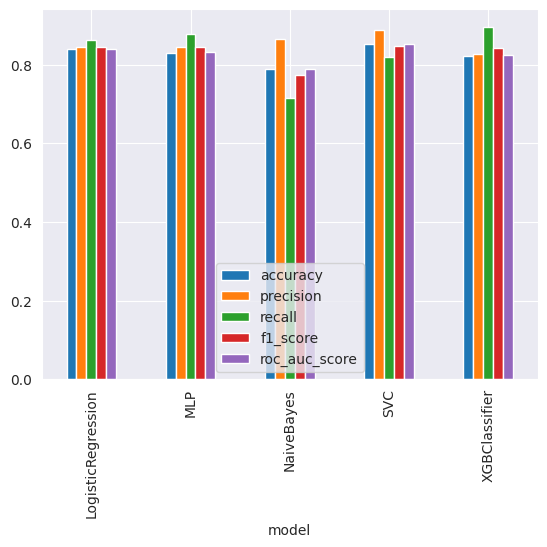

In [33]:
sns.set_style(style='darkgrid')
average_scores.plot(kind='bar')
plt.show()

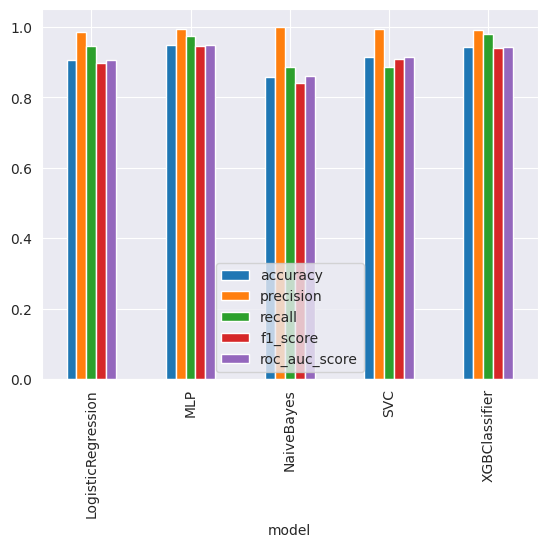

In [35]:
# max scores
sns.set_style(style='darkgrid')
metrics.groupby(
    by='model'
).max().plot(kind='bar')
plt.show()

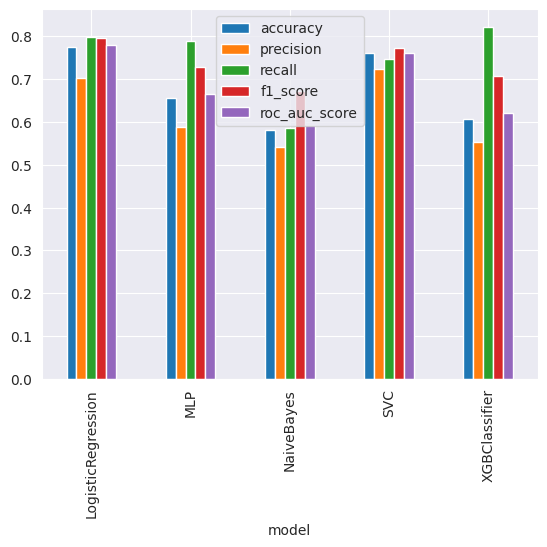

In [34]:
# Min Scores
sns.set_style(style='darkgrid')
metrics.groupby(
    by='model'
).min().plot(kind='bar')
plt.show()

In [38]:
# sort data
metrics.sort_values(
    by=['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc_score'],
    ascending=False
)

,model,accuracy,precision,recall,f1_score,roc_auc_score,type
54,MLP,0.949028,0.993616,0.904274,0.946842,0.949209,train
50,XGBClassifier,0.943681,0.992027,0.895006,0.941022,0.943877,train
56,XGBClassifier,0.943681,0.992027,0.895006,0.941022,0.943877,train
38,XGBClassifier,0.917167,0.989973,0.843168,0.910692,0.917298,train
44,XGBClassifier,0.917167,0.989973,0.843168,0.910692,0.917298,train
...,...,...,...,...,...,...,...
67,MLP,0.708000,0.631752,0.974593,0.766587,0.712198,test
55,MLP,0.654375,0.587200,0.952010,0.726373,0.664787,test
51,XGBClassifier,0.606875,0.551901,0.979248,0.705937,0.619901,test
57,XGBClassifier,0.606875,0.551901,0.979248,0.705937,0.619901,test


In [37]:
metrics.columns

Index(['model', 'accuracy', 'precision', 'recall', 'f1_score', 'roc_auc_score',
       'type'],
      dtype='object')

In [39]:
# Best Performance wise sorted
average_scores.sort_values(
    by=['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc_score'],
    ascending=False
)

,accuracy,precision,recall,f1_score,roc_auc_score
model,,,,,
SVC,0.853130,0.889904,0.819366,0.849010,0.853553
LogisticRegression,0.840243,0.846014,0.862088,0.845782,0.841254
MLP,0.830696,0.844383,0.878934,0.846035,0.832614
XGBClassifier,0.821486,0.827521,0.896172,0.843343,0.823893
NaiveBayes,0.788880,0.865993,0.715720,0.774082,0.789415


In [52]:
# Group by train performace
metrics[metrics['type']=='train'].groupby(
    by=['model', 'type']
).mean().sort_values(
    by=['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc_score'],
    ascending=False
)

,,accuracy,precision,recall,f1_score,roc_auc_score
model,type,,,,,
XGBClassifier,train,0.917743,0.987534,0.846447,0.911435,0.917888
MLP,train,0.914162,0.989596,0.837344,0.906816,0.914316
SVC,train,0.898363,0.986722,0.807823,0.888172,0.898554
LogisticRegression,train,0.880319,0.938627,0.826181,0.875935,0.880442
NaiveBayes,train,0.830051,0.954120,0.695721,0.802703,0.830335


In [54]:
# Group by test performace
metrics[metrics['type']=='test'].groupby(
    by=['model', 'type']
).mean().sort_values(
    by=['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc_score'],
    ascending=False
)

,,accuracy,precision,recall,f1_score,roc_auc_score
model,type,,,,,
SVC,test,0.807896,0.793085,0.830909,0.809848,0.808552
LogisticRegression,test,0.800167,0.753401,0.897996,0.815630,0.802066
NaiveBayes,test,0.747708,0.777867,0.735720,0.745461,0.748496
MLP,test,0.747229,0.699170,0.920525,0.785255,0.750912
XGBClassifier,test,0.725229,0.667508,0.945898,0.775250,0.729898
